In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer    
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Steps

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Deployment

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Dropping last 3 columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])    

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)


In [8]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [10]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking null
df.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
# checking duplicates
df.duplicated().sum()

403

In [13]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int32 
 1   message  5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


## EDA


In [15]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

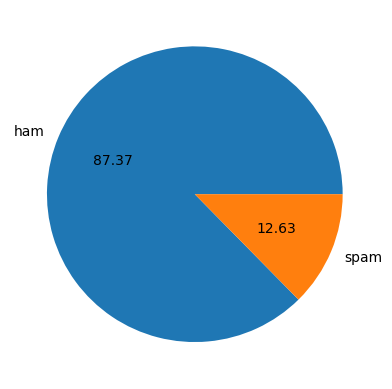

In [17]:
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# num of characters
df['num_alphabets'] = df['message'].apply(len)

In [20]:
df.head()

,label,message,num_alphabets
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# num of words
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
df.head()

,label,message,num_alphabets,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
# num of sentences
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,label,message,num_alphabets,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_alphabets', 'num_words', 'num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# ham count
df[df['label'] == 0] [['num_alphabets', 'num_words', 'num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# spam count
df[df['label'] == 1] [['num_alphabets', 'num_words', 'num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_alphabets', ylabel='Count'>

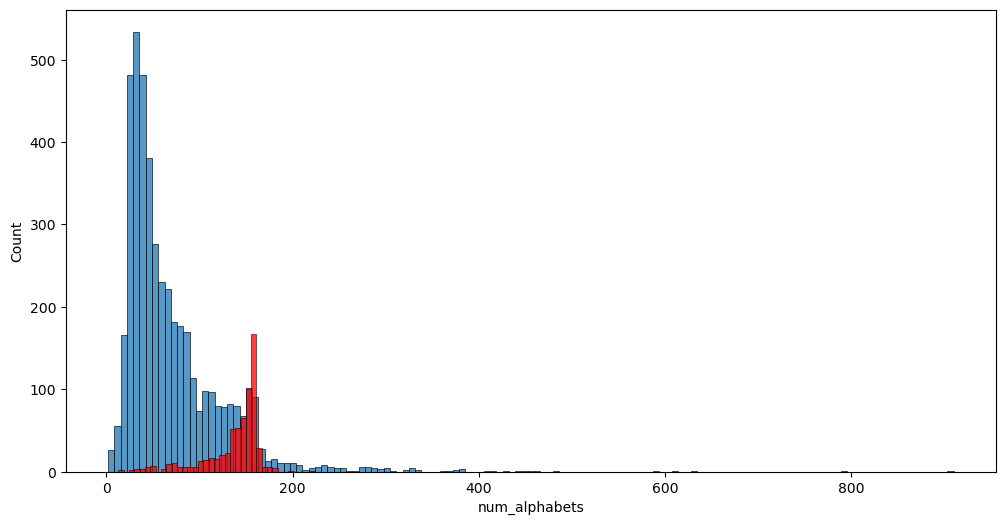

In [28]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label'] == 0]['num_alphabets'])
sns.histplot(df[df['label'] == 1]['num_alphabets'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

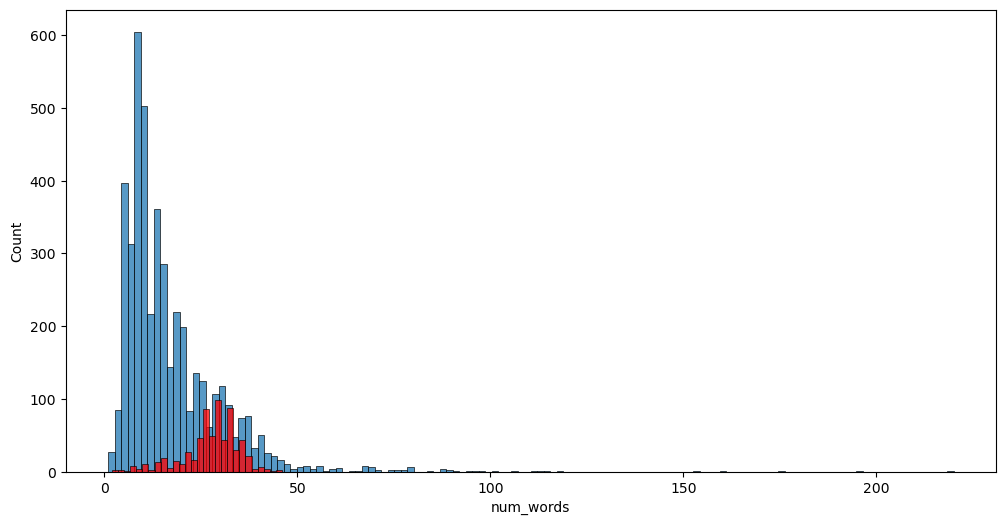

In [29]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

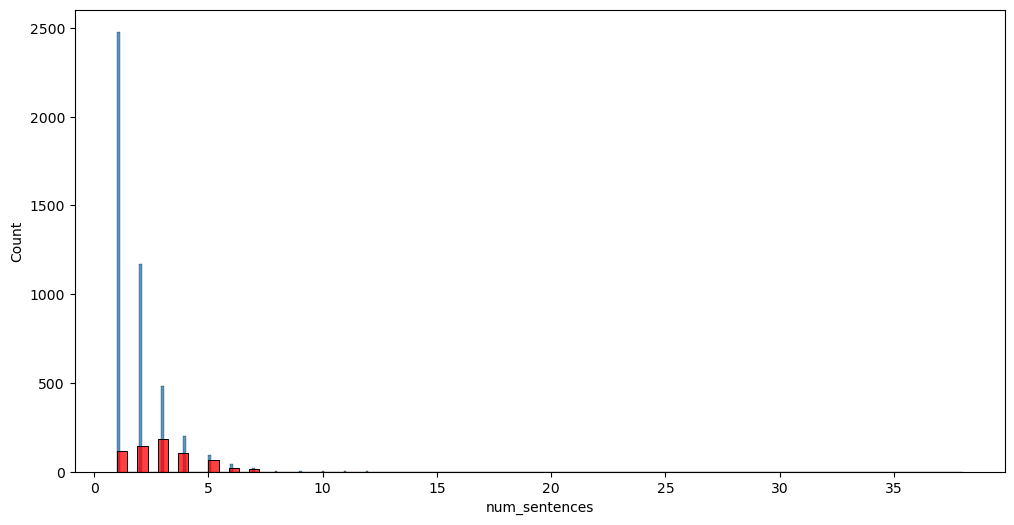

In [30]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label'] == 0]['num_sentences'])
sns.histplot(df[df['label'] == 1]['num_sentences'], color = 'red')

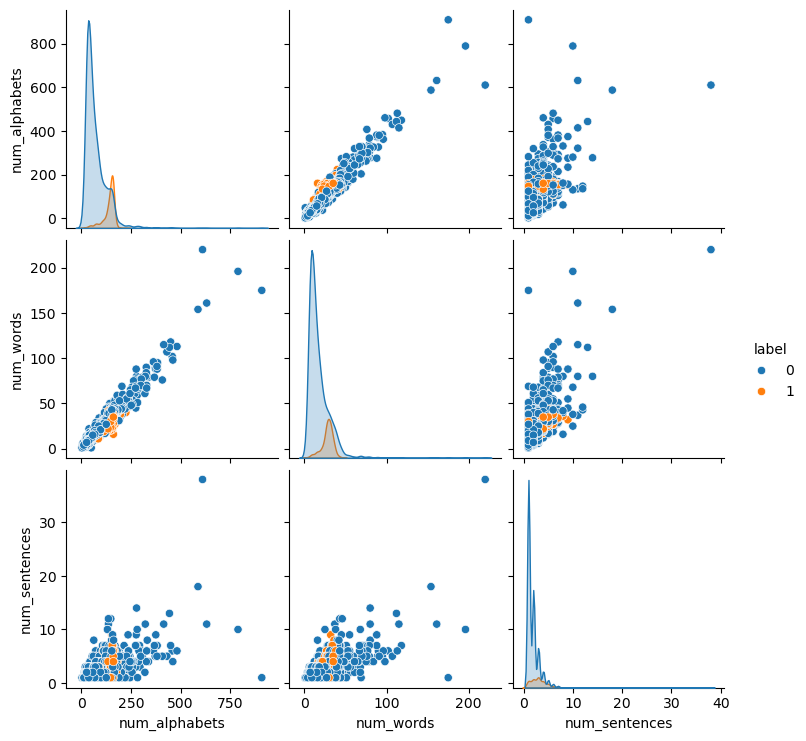

In [31]:
sns.pairplot(df, hue = 'label')

In [32]:
df.head()

,label,message,num_alphabets,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['label', 'num_alphabets', 'num_words', 'num_sentences']].corr()

,label,num_alphabets,num_words,num_sentences
label,1.000000,0.384717,0.262912,0.263939
num_alphabets,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

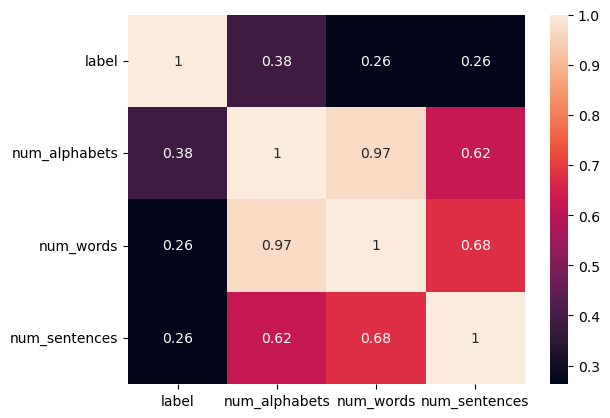

In [34]:
sns.heatmap(df[['label', 'num_alphabets', 'num_words', 'num_sentences']].corr(),annot=True)


## Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuations
- Stemming

In [35]:
ps = PorterStemmer()
ps.stem('running')

'run'

In [36]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)


In [37]:
text = 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s'
text_transform(text)

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate cs appli 08452810075over18'

In [38]:
df['message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [39]:
df['transformed_text'] = df['message'].apply(text_transform)

In [40]:
df.head()

,label,message,num_alphabets,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
!pip install wordcloud

In [42]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [43]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

In [44]:
df['transformed_text'].isnull().sum()

0

In [45]:
type(spam_wc)


wordcloud.wordcloud.WordCloud

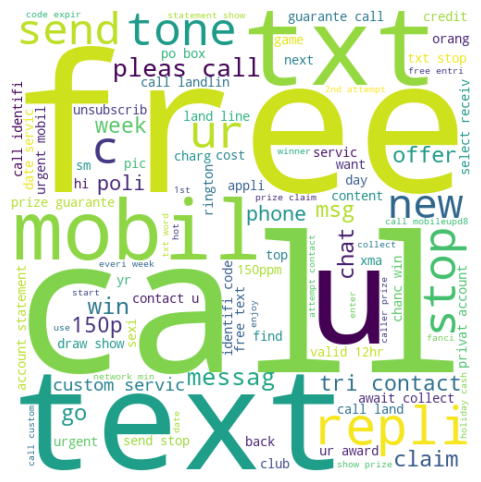

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc.to_image(), interpolation='bilinear')
plt.axis('off')
plt.show()

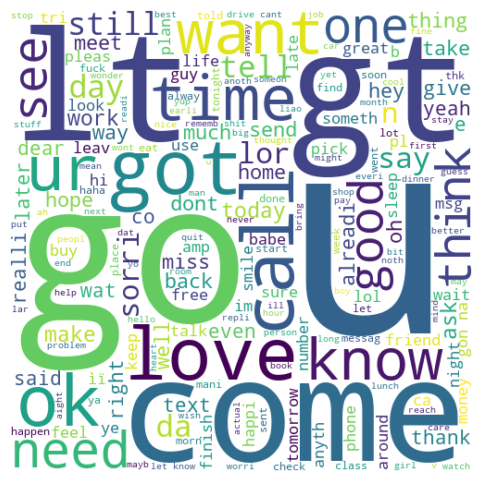

In [47]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc.to_image(), interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [49]:
len(spam_corpus)

9939

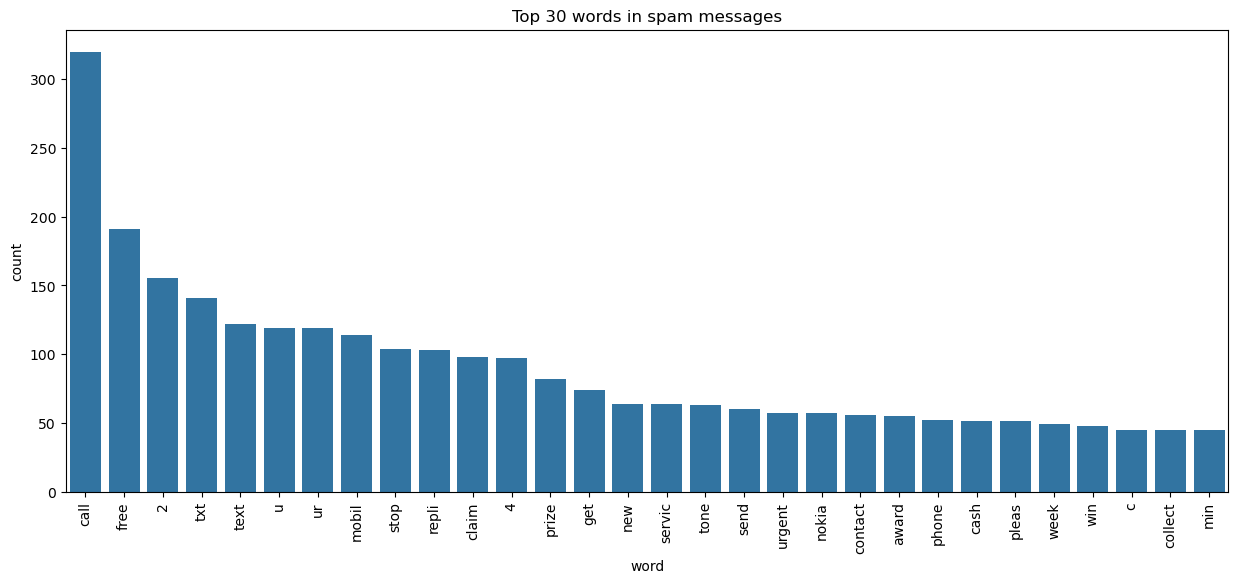

In [50]:
top_words = Counter(spam_corpus).most_common(30)
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

plt.figure(figsize=(15,6))
sns.barplot(x='word', y='count', data=df_top_words)
plt.xticks(rotation=90)
plt.title("Top 30 words in spam messages")
plt.show()

In [51]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)


35404

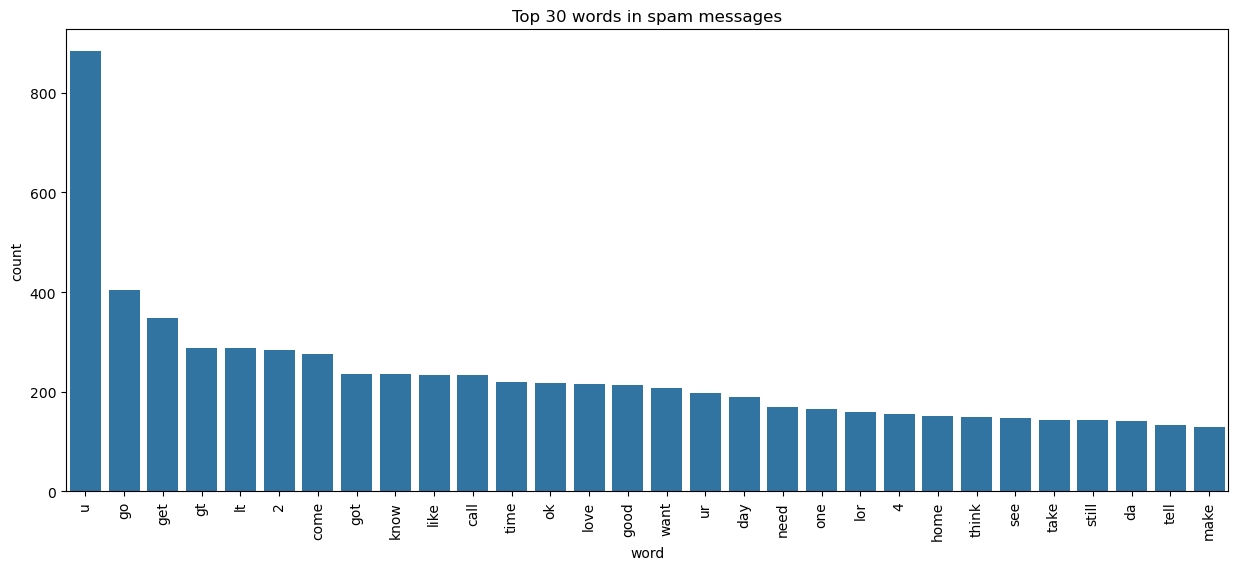

In [52]:
top_words = Counter(ham_corpus).most_common(30)
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

plt.figure(figsize=(15,6))
sns.barplot(x='word', y='count', data=df_top_words)
plt.xticks(rotation=90)
plt.title("Top 30 words in spam messages")
plt.show()

## Model Building

In [53]:
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()

In [54]:
X.shape

(5169, 6708)

In [55]:
y = df['label'].values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034

0.5315315315315315


In [60]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.83      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034

0.8344370860927153


In [61]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

0.9734513274336283


In [62]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape

(5169, 6708)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       896
           1       0.52      0.82      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.78      1034
weighted avg       0.91      0.88      0.89      1034

0.5231481481481481


In [67]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

1.0


In [68]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

0.9734513274336283


In [79]:
svc = LinearSVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [82]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [83]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9666666666666667)

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


c:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [87]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
7,ETC,0.972921,0.982456
0,SVC,0.974855,0.966667
9,xgb,0.974855,0.951613
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
8,GBDT,0.952611,0.923810
3,DT,0.936170,0.846154


In [88]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [89]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.974855
5,xgb,Accuracy,0.974855
6,AdaBoost,Accuracy,0.961315
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,DT,Accuracy,0.936170


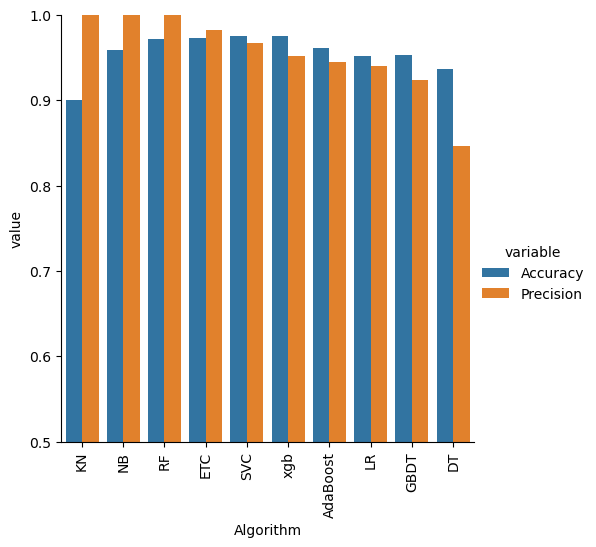

In [90]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [99]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000
3,ETC,0.972921,0.982456,0.972921,0.982456
4,SVC,0.974855,0.966667,0.974855,0.966667
5,xgb,0.974855,0.951613,0.974855,0.951613
6,AdaBoost,0.961315,0.945455,0.961315,0.945455
7,LR,0.951644,0.940000,0.951644,0.940000
8,GBDT,0.952611,0.923810,0.952611,0.923810
9,DT,0.936170,0.846154,0.936170,0.846154


In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [93]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [94]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [96]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
3,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667
5,xgb,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613
6,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
7,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
8,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
9,DT,0.936170,0.846154,0.936170,0.846154,0.936170,0.846154,0.936170,0.846154


### Choosing Tfidf -> MNB (Multinomial Naive Bayes, since precision score matters more for imbalances data, and here, precision score is 100%)

In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
print(text_transform("Youve been selected for a free vacation to Maldives! Call 0800-999-777 to book your trip."))


select free vacat maldiv call book trip
